<a href="https://colab.research.google.com/github/gabyrr/CursoTIA/blob/main/TIA_red_neuronal_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Un ejemplo de un modelo con una arquitectura de redes neuronales profundas
Notebook perteneciente al curso: Tópicos de inteligencia artificial: de métodos clásicos a modelos generativos. Por Gabriela Ramírez de la Rosa

**Fashion-MNIST**
28x28 pixel images of 10 classes of fashion items


In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed
import random
import os

import numpy as np
import matplotlib.pyplot as plt

#Trying to set all seeds
os.environ['PYTHONHASHSEED']=str(0)
random.seed(0)
seed(0)
set_seed(0)
seed_value= 0

In [ ]:
# Load the fashion-mnist pre-shuffled train data and test data
(X, y), (_,_) = tf.keras.datasets.fashion_mnist.load_data()
print("X shape:", X.shape, "y shape:", y.shape)

X = X.reshape(60000, 28, 28)
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal",
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

X shape: (60000, 28, 28) y shape: (60000,)


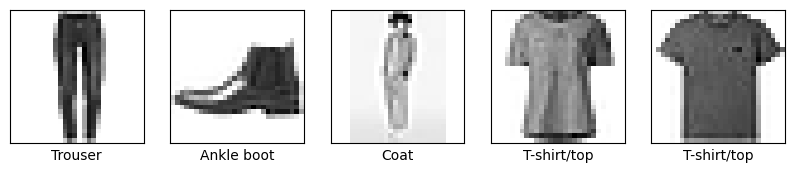

In [ ]:
# Imprime algunos ejemplos
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,60000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(fmnist_classes[y[n]]))
plt.show();

### Diseñando la red
- modelo secuencial
- 1 capa de entrada: un vector plano de 28*28=784 nodos
- 2 capas densas ocultas: 512 nodos cada una. Activación ReLU
- 1 capa de salida: 10 nodos y activación softmax

In [ ]:
from tensorflow.keras import initializers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Resumen del modelo
Muchos parámetros:
- capa oculta 1: (28*28+1) * 512 = 401920
- capa oculta 1: (512+1) * 512 = 262656
- capa de salida: (512 + 1) * 10 = 5130

In [ ]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

### Elegir la función de pérdida, optimizador y métricas


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#### Normalización de la entrada

In [ ]:
from sklearn.model_selection import train_test_split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X, y, train_size=50000, shuffle=True, random_state=0)

Xf_train = Xf_train.reshape((50000, 28 * 28))
Xf_test = Xf_test.reshape((10000, 28 * 28))

# TODO: check if standardization works better
Xf_train = Xf_train.astype('float32') / 255
Xf_test = Xf_test.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
yf_train = to_categorical(yf_train)
yf_test = to_categorical(yf_test)

### Elegir hiperparámetros en el entrenamiento
- épocas, las necesarias para cubrir todos los datos (iteraciones sobre el conjunto de entrenamiento)
- tamaño del lote, se prefieren tamaños pequeños (32, 64, ... ejemplos)

In [ ]:
history = network.fit(Xf_train, yf_train, epochs=3, batch_size=32, verbose=0)

### Predicción y evaluación

array([8.6122059e-04, 9.4779388e-08, 9.9730188e-01, 1.9679874e-06,
       1.7354049e-04, 1.4716942e-08, 1.6589273e-03, 6.2476713e-09,
       2.2627535e-06, 1.4680860e-08], dtype=float32)

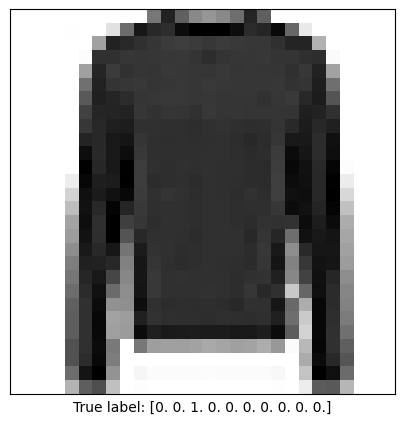

In [ ]:
np.set_printoptions(precision=7)
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sample_id = 5
axes.imshow(Xf_test[sample_id].reshape(28, 28), cmap=plt.cm.gray_r)
axes.set_xlabel("True label: {}".format(yf_test[sample_id]))
axes.set_xticks([])
axes.set_yticks([])
yf_pred = network.predict(Xf_test, verbose=0)

yf_pred[sample_id]

In [ ]:
test_loss, test_acc = network.evaluate(Xf_test, yf_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.840499997138977
